# Natural Language Processing Project

# Quora Question Pairs

The goal of this competition is to predict which of the provided pairs of questions contain two questions with the same meaning. The ground truth is the set of labels that have been supplied by human experts. The ground truth labels are inherently subjective, as the true meaning of sentences can never be known with certainty. Human labeling is also a 'noisy' process, and reasonable people will disagree. As a result, the ground truth labels on this dataset should be taken to be 'informed' but not 100% accurate, and may include incorrect labeling. 

Data fields

id - the id of a training set question pair

qid1, qid2 - unique ids of each question (only available in train.csv)

question1, question2 - the full text of each question

is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# The Data

In [2]:
data=pd.read_csv('train.csv') #this is our training data for Quora Question Pairs

In [3]:
data.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [4]:
cols=data.drop(['id','qid1','qid2'],axis=1) #i will not use id,qid1 and qid2 in EDA and machine learning model. So I drop them.

In [5]:
cols.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 3 columns):
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(1), object(2)
memory usage: 9.3+ MB


In [7]:
cols.isnull().sum()

question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
#Empty rows are few. So i decided to drop empty ones.

In [16]:
quora=cols.dropna()

In [17]:
quora.isnull().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

In [18]:
quora['length q1'] = quora['question1'].apply(len)
quora['length q2']= quora['question2'].apply(len) # i will use this informations in EDA part.

C:\Users\nsever\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nsever\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
quora.head()

,question1,question2,is_duplicate,length q1,length q2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


In [20]:
quora.describe()

,is_duplicate,length q1,length q2
count,404287.000000,404287.000000,404287.000000
mean,0.369201,59.536997,60.108507
std,0.482589,29.940553,33.863588
min,0.000000,1.000000,1.000000
25%,0.000000,39.000000,39.000000
50%,0.000000,52.000000,51.000000
75%,1.000000,72.000000,72.000000
max,1.000000,623.000000,1169.000000


# EDA# 

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


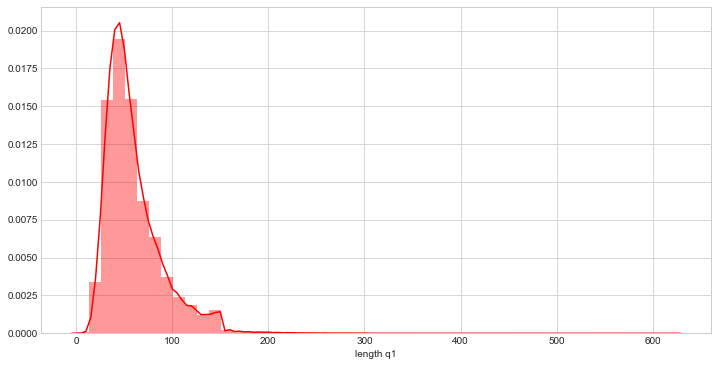

In [23]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.distplot(quora['length q1'],color='red',bins=50)

In [ ]:
#Question 1's lenth is mostly around 50.

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


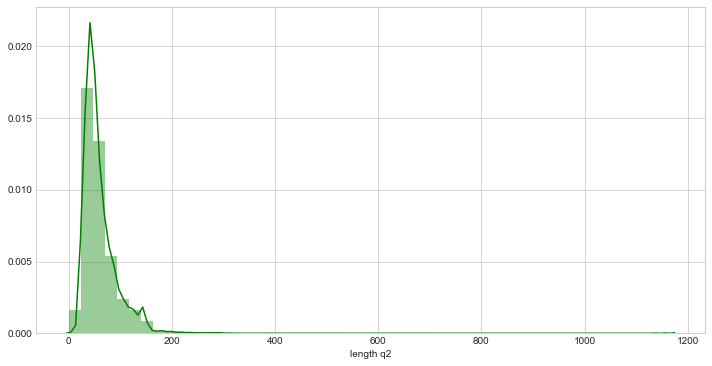

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(quora['length q2'],color='green',bins=50)

In [ ]:
#lets check outliers

<Figure size 864x432 with 0 Axes>

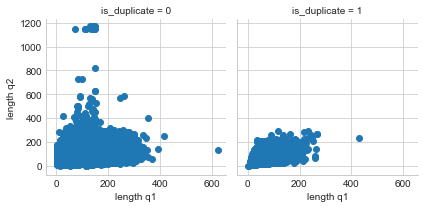

In [25]:
plt.figure(figsize=(12,6))
g = sns.FacetGrid(quora,col='is_duplicate')
g.map(plt.scatter,'length q1','length q2')


In [ ]:
#It is easy so that there is a positive correlation between length q1 and length q2 when they are duplicate. It is hard to say 
#for they are not duplicate. 

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


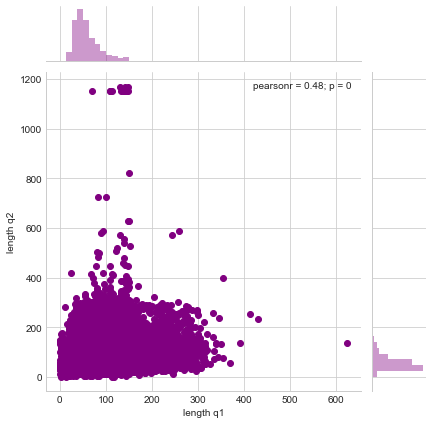

In [26]:
sns.jointplot(x='length q1',y='length q2',data=quora,kind='scatter',color='purple')

In [ ]:
#it is hard to say strong correlation between q1 and q2.(0.48) 

In [ ]:
#lets check the outliers

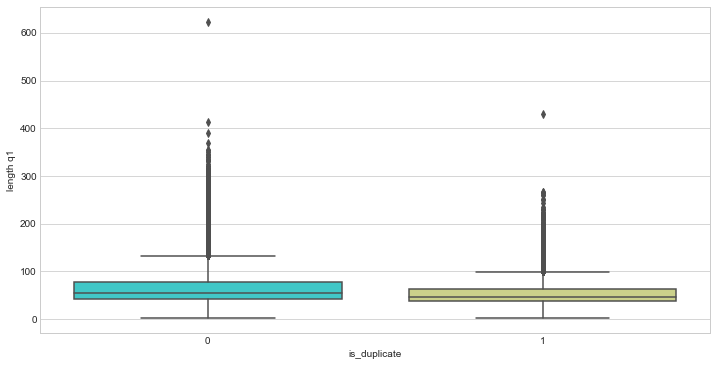

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x='is_duplicate',y='length q1',data=quora,palette='rainbow')

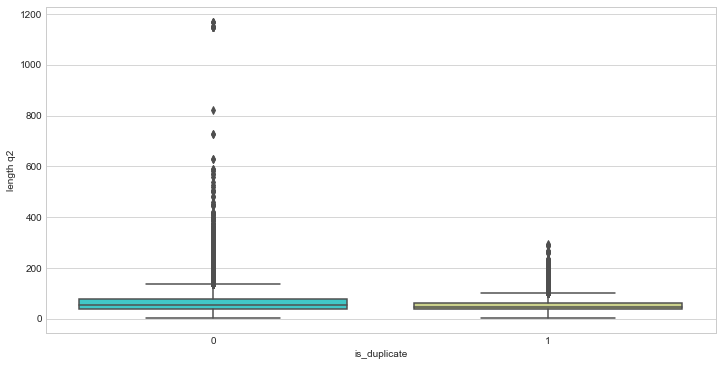

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='is_duplicate',y='length q2',data=quora,palette='rainbow')

In [ ]:
#we can clearly see the outliers for q1 and q2 when is_duplicate=0

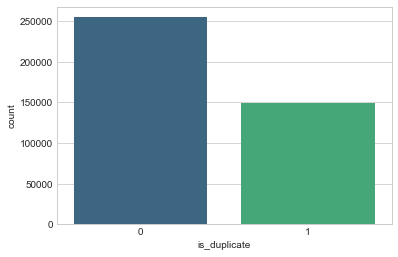

In [29]:
sns.countplot(x='is_duplicate',data=quora,palette='viridis')

In [ ]:
#is_duplicate=1 is around 150.000, is_duplicate=0 is around 250.000

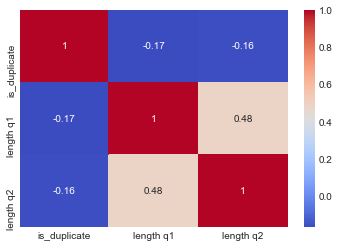

In [30]:
sns.heatmap(quora.corr(),cmap='coolwarm',annot=True)

# NLP Classification Task

In [ ]:
#i will use CountVectorizer, which converts texts to vectors

In [31]:
import string
from nltk.corpus import stopwords

In [73]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Importing CountVectorizer and create a CountVectorizer object.

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [127]:
X=quora['question1']+quora['question2']
y=quora['is_duplicate']

In [128]:
cv=CountVectorizer(stop_words='english')

In [129]:
X=cv.fit_transform(X)

In [130]:
X.shape

(404287, 86703)

# Train Test Split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

# Training a Model# 

In [ ]:
# I will use MultinomialNB

In [133]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [134]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Predictions and Evaluations

In [135]:
prediction=nb.predict(X_test)

In [136]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [147]:
print(accuracy_score(y_test,prediction))

0.7285034669832711


In [137]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.78      0.80      0.79     76526
          1       0.64      0.61      0.62     44761

avg / total       0.73      0.73      0.73    121287



In [139]:
print(confusion_matrix(y_test,prediction))

[[61047 15479]
 [17450 27311]]


# Lets compare with other methods

In [140]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [141]:
from sklearn.pipeline import Pipeline

In [142]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words = 'english')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [143]:
X=quora['question1']+quora['question2']
y=quora['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [144]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        s...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [145]:
predictions2=pipeline.predict(X_test)

In [146]:
print(accuracy_score(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(confusion_matrix(y_test,predictions2))

0.7388013554626629
             precision    recall  f1-score   support

          0       0.74      0.91      0.81     76526
          1       0.74      0.45      0.56     44761

avg / total       0.74      0.74      0.72    121287

[[69644  6882]
 [24798 19963]]


In [148]:
from sklearn.linear_model import LogisticRegression

In [154]:
X=quora['question1']+quora['question2']
y=quora['is_duplicate']

In [155]:
cv=CountVectorizer(stop_words='english')

In [156]:
X=cv.fit_transform(X)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [158]:
lm=LogisticRegression()

In [159]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
prediction3=lm.predict(X_test)

In [161]:
print(accuracy_score(y_test,prediction3))

0.7516056955815545


In [162]:
print(classification_report(y_test,prediction3))

             precision    recall  f1-score   support

          0       0.78      0.84      0.81     76526
          1       0.69      0.60      0.64     44761

avg / total       0.75      0.75      0.75    121287

